In [1]:
%matplotlib inline
%run 'notebook_utils.py'

import sys
import pprint
import cProfile

import matplotlib.pyplot as plt
import numpy             as np
  
import radical.utils     as ru
import radical.pilot     as rp
import radical.entk      as re
import radical.analytics as ra

from   radical.utils.profile import *
from   radical.pilot.states  import *
import glob
from math import sqrt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoMinorLocator

In [19]:
df_ws = pd.read_csv("supermic_stress_ws.csv").set_index('Unnamed: 0')
df_ws_err = pd.read_csv('supermic_stress_ws_err.csv').set_index('Unnamed: 0')

df_ss = pd.read_csv("supermic_stress_ss.csv").set_index('Unnamed: 0')
df_ss_err = pd.read_csv('supermic_stress_ss_err.csv').set_index('Unnamed: 0')

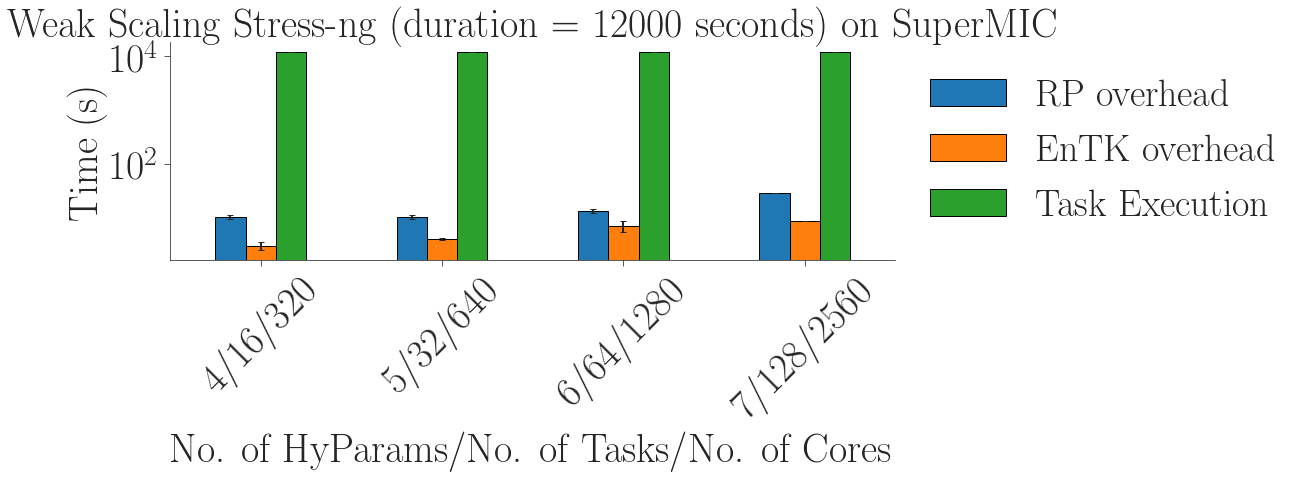

In [20]:
fig, ax = fig_setup(figsize=(13,4))
FONTSIZE = 20 
width=0.5
ax = df_ws.plot(kind='bar',
             ax = ax,
             width = width,
             yerr = df_ws_err,
             logy = True,
             rot=45)


plt.xticks(np.arange(4), ('4/16/320', '5/32/640', '6/64/1280', '7/128/2560'))
ax.set_title('Weak Scaling Stress-ng (duration = 12000 seconds) on SuperMIC')
ax.set_xlabel('No. of HyParams/No. of Tasks/No. of Cores')
ax.set_ylabel('Time (s)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('figures/stress-ng-12000-supermic.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/stress-ng-12000-supermic.png', dpi=300, bbox_inches='tight')

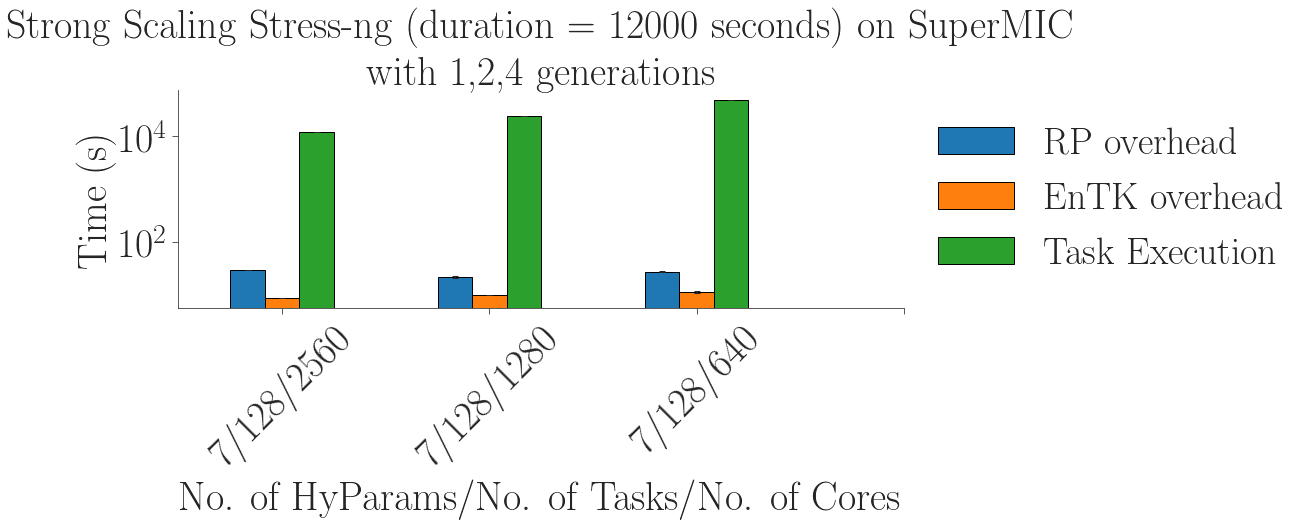

In [21]:
fig, ax = fig_setup(figsize=(13,4))
FONTSIZE = 20 
width=0.5
ax = df_ss.plot(kind='bar',
             ax = ax,
             width = width,
             yerr = df_ss_err,
             logy = True,
             rot=45)


plt.xticks(np.arange(4), ('7/128/2560', '7/128/1280', '7/128/640'))
ax.set_title('Strong Scaling Stress-ng (duration = 12000 seconds) on SuperMIC \n with 1,2,4 generations')
ax.set_xlabel('No. of HyParams/No. of Tasks/No. of Cores')
ax.set_ylabel('Time (s)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('figures/stress-ng-12000-ss-supermic.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/stress-ng-12000-ss-supermic.png', dpi=300, bbox_inches='tight')